In [3]:
import numpy as np
import imageio
from skimage import io
import matplotlib.pyplot as plt
from scipy.stats import kruskal, normaltest
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('../data/train.csv')
df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


# Metadata univariate EDA

### Data breakdown

There are 2056 patients, with over 33,000 images:

In [9]:
len(df['patient_id'].unique())

2056

In [10]:
df.shape

(33126, 8)

Relevant metadata includes sex, approximate age, location of the image on the body, and diagnosis:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


### Patient data

Most patients have less than 60 images, with 12 patients having over 100 images:

In [14]:
sum(df['patient_id'].value_counts() < 60)

2013

In [15]:
sum(df['patient_id'].value_counts() > 100)

12

A full breakdown of the number patients with number of images:

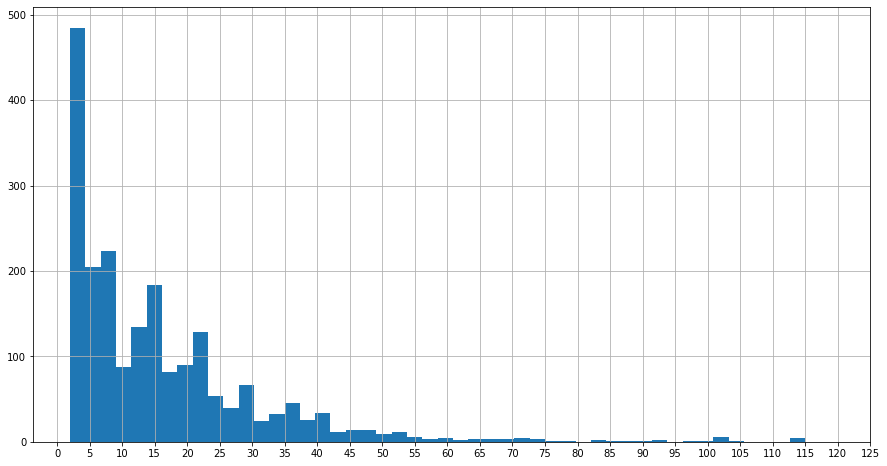

In [18]:
_ = plt.figure(figsize=(15,8))
_ = df['patient_id'].value_counts().hist(bins=48)
_ = plt.xticks(range(0,130,5))

There is a relatively similar number of images representing males and females:

In [9]:
df['sex'].value_counts()

male      17080
female    15981
Name: sex, dtype: int64

There are 18 different approximate age groups, with a normal spread:

In [63]:
len(df['age_approx'].dropna().unique())

18

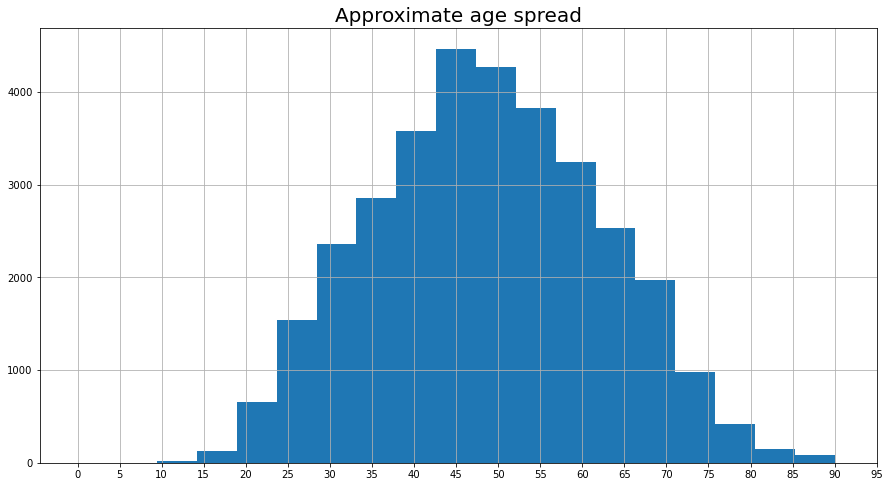

In [60]:
_ = plt.figure(figsize=(15,8))
_= df['age_approx'].hist(bins=18)
_ = plt.xticks(range(0,100,5))
_ = plt.title('Approximate age spread', fontsize=20)

### Image data

There are six general locations of the images. The images primarily focus on the torso, with some on the upper and lower extremity.

In [27]:
df['anatom_site_general_challenge'].value_counts()

torso              16845
lower extremity     8417
upper extremity     4983
head/neck           1855
palms/soles          375
oral/genital         124
Name: anatom_site_general_challenge, dtype: int64

Diagnosis data would be a target, rather than a source of information. Seeing as the objective is to classify as "melanoma" or "non-melanoma," other diagnoses will be irrelevant.

Nevertheless, it may be worth seeing what images we have:

In [12]:
df['diagnosis'].value_counts()

unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
cafe-au-lait macule                       1
atypical melanocytic proliferation        1
Name: diagnosis, dtype: int64

Most images are undiagnosed (AKA `unkown`.) Some are `nevus`, a type of birthmark. There are 584 melanoma images, which is reflected in both the `benign_malignant` and `target` features:

In [13]:
df['benign_malignant'].value_counts()

benign       32542
malignant      584
Name: benign_malignant, dtype: int64

In [14]:
df['target'].value_counts()

0    32542
1      584
Name: target, dtype: int64

The only relevant feature of the three is therefore `target`, as a binary features indicating melanoma/malignancy.

## Conclusions

### Introductory
There are 33,000 images, from 2056 patients. There are a few patients with over 60 images. The vast majority of patients have 25 or fewer images. There appears to be some missing data that will have to be imputed in a further step.

### Patients
The data is relatively evenly split between male and female. It is normally distributed with regard to age, with a slight left skew.

### Images
Most images come from the torso or lower extremity. Very few are in the oral/genital or palm/sole region. 
In comparison of `diagnosis` and `benign_malignant`, the numbers for `melanoma` and `malignant` are the same. It is likely that `malignant` means `melanoma` here. Similarly, `target` contains the same number of `1` values as `benign_malignant` does `malignant`. We will confirm these correlations during multivariate EDA.

While `diagnosis` is indeed interesting, it appears to be irrelevant: The primary objective is to classify melanoma, not other diagnoses. As such, and considering that it is essentially a target variable as well and will not be information available prior to diagnosis in a production situation, we will likely be dropping this from further analysis.